In [79]:
# notebook imports

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
import matplotlib.pyplot as plt

import random
import numpy as np

In [34]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [35]:
X_train.shape[0]

60000

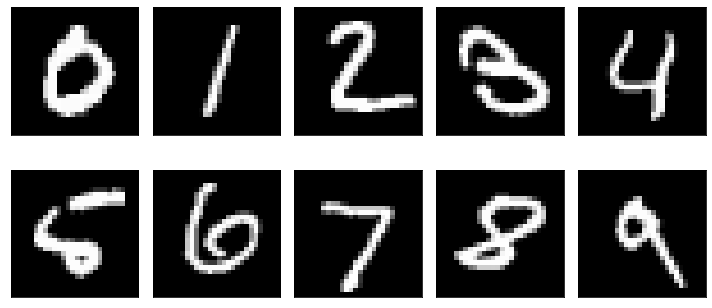

In [36]:
# visualizing the data

fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10))= plt.subplots(2,5,figsize=(10,5))

for idx,ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]):
    for i in range(1000):
        if y_test[i] == idx:
            ax.imshow(X_test[i], cmap='gray')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break
plt.tight_layout()
plt.show()

In [37]:
# building autoencoders in keras


In [38]:
model = Sequential()


hidden_layer_size =1

model.add(Dense(units=hidden_layer_size, input_shape=(784,),
               activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_5 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [40]:
def create_basic_autoencoder(hidden_layer_size):
    model = Sequential()
    model.add(Dense(units=hidden_layer_size, input_shape=(784,),
                   activation='relu'))
    model.add(Dense(784, activation='sigmoid'))
    return model

model = create_basic_autoencoder(hidden_layer_size=1)

In [41]:
# preprocessing ,

# 1. reshape the image 28x28 into 784x1 vector
# 2. normalize the value of vectors between 0 and 1 from current  0 to 255 (smaller value makes easy to train nn)


In [42]:
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

In [43]:
X_test_reshaped.shape

(10000, 784)

In [44]:
X_train_reshaped = X_train_reshaped/255.
X_test_reshaped = X_test_reshaped/255.

In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
model.fit(X_train_reshaped, X_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0754
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0653
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0641
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0635
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0632
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0629
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0624
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0620
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0616
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0613


In [47]:
output = model.predict(X_test_reshaped)

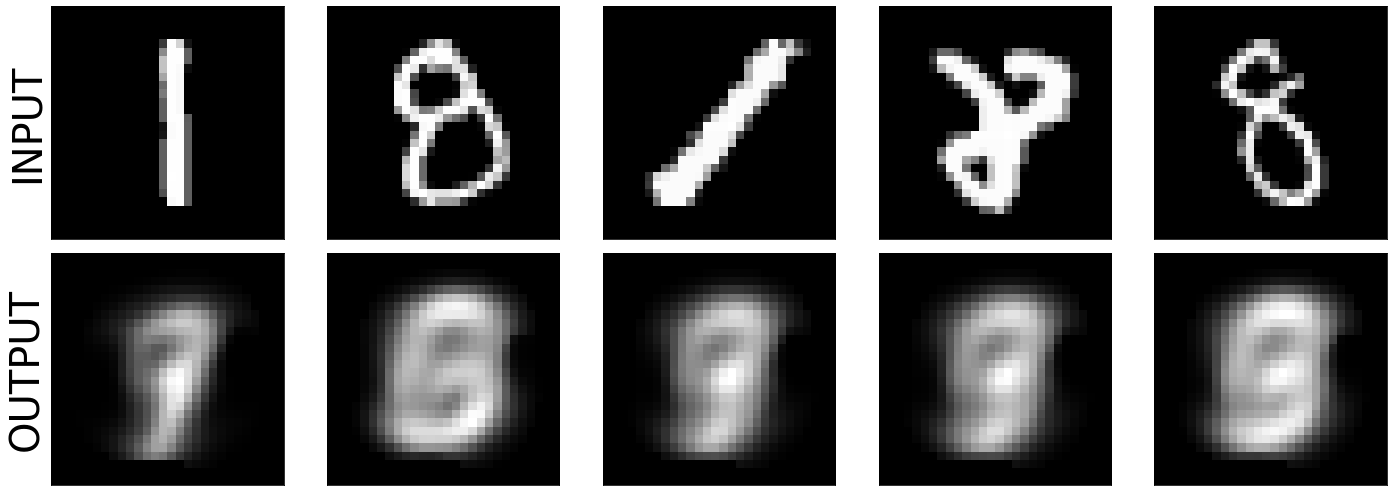

In [60]:
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5, figsize=(20,7))

# randomly select 5 images

randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# plot the original image (input) on the top row

for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test[randomly_selected_imgs[i]], cmap='gray')
    if i == 0 :
        ax.set_ylabel("INPUT",size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot the output from the autoencoders on the bottom row

for i,ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("OUTPUT", size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()
    

In [61]:
# let's see the effect of different hidden_layer_size on the output

In [62]:
hiddenLayerSize_2_model = create_basic_autoencoder(hidden_layer_size=2)
hiddenLayerSize_4_model = create_basic_autoencoder(hidden_layer_size=4)
hiddenLayerSize_8_model = create_basic_autoencoder(hidden_layer_size=8)
hiddenLayerSize_16_model = create_basic_autoencoder(hidden_layer_size=16)
hiddenLayerSize_32_model = create_basic_autoencoder(hidden_layer_size=32)

In [64]:
hiddenLayerSize_2_model.compile(optimizer='adam',loss='mean_squared_error')
hiddenLayerSize_2_model.fit(X_train_reshaped,X_train_reshaped,epochs=10, verbose=0)

hiddenLayerSize_4_model.compile(optimizer='adam',loss='mean_squared_error')
hiddenLayerSize_4_model.fit(X_train_reshaped,X_train_reshaped,epochs=10, verbose=0)

hiddenLayerSize_8_model.compile(optimizer='adam',loss='mean_squared_error')
hiddenLayerSize_8_model.fit(X_train_reshaped,X_train_reshaped,epochs=10, verbose=0)

hiddenLayerSize_16_model.compile(optimizer='adam',loss='mean_squared_error')
hiddenLayerSize_16_model.fit(X_train_reshaped,X_train_reshaped,epochs=10, verbose=0)

hiddenLayerSize_32_model.compile(optimizer='adam',loss='mean_squared_error')
hiddenLayerSize_32_model.fit(X_train_reshaped,X_train_reshaped,epochs=10, verbose=0)

In [65]:
output_2_model = hiddenLayerSize_2_model.predict(X_test_reshaped)
output_4_model = hiddenLayerSize_4_model.predict(X_test_reshaped)
output_8_model = hiddenLayerSize_8_model.predict(X_test_reshaped)
output_16_model = hiddenLayerSize_16_model.predict(X_test_reshaped)
output_32_model = hiddenLayerSize_32_model.predict(X_test_reshaped)

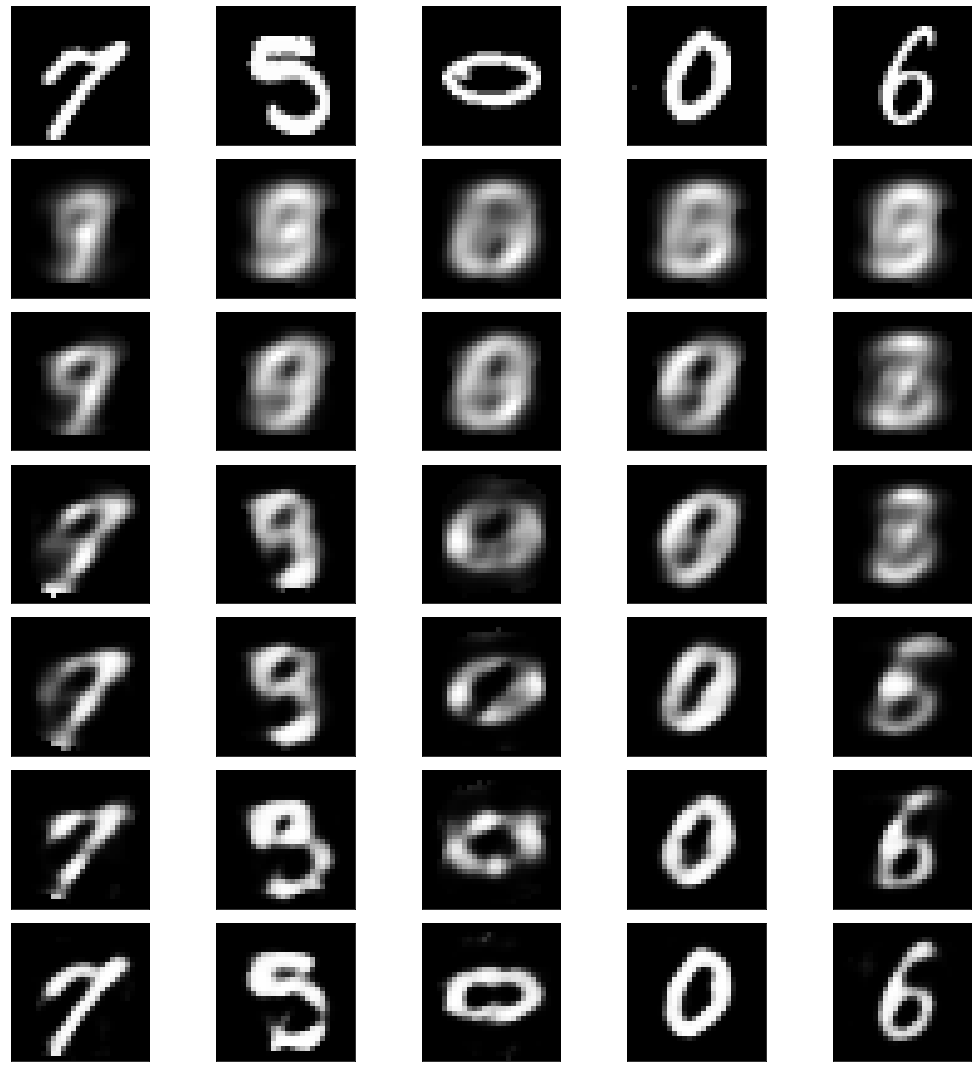

In [69]:
# plotting all the output

fig, axes = plt.subplots(7,5,figsize=(15,15))

randomly_selected_imgs = random.sample(range(output.shape[0]),5)
outputs = [X_test, output, output_2_model, output_4_model, output_8_model, output_16_model,output_32_model]

# iterate through each subplot and plot accordingly

for row_num, row in enumerate(axes):
    for col_num, ax in enumerate(row):
        ax.imshow(outputs[row_num][randomly_selected_imgs[col_num]].reshape(28,28), cmap='gray')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

In [70]:
# we can see that output image becomes clear and closer to input images as we doubles the number of nodes in the hidden layer

## Denoising Autoencoders

In [72]:
X_train_noisy = X_train_reshaped + np.random.normal(0,0.5,size=X_train_reshaped.shape)
X_test_noisy = X_test_reshaped+ np.random.normal(0,0.5, size=X_test_reshaped.shape)

In [73]:
# clip the noisy image between 0 and 1 to normlaize the image

X_train_noisy = np.clip(X_train_noisy, a_min=0, a_max=1)
X_test_noisy = np.clip(X_test_noisy, a_min=0, a_max=1)

In [74]:
# let's define a basic autoencoder with number of hidden units to be 16

In [75]:
basic_denoise_autoencoder = create_basic_autoencoder(hidden_layer_size=16)

In [76]:
basic_denoise_autoencoder.compile(optimizer='adam', loss='mean_squared_error')
basic_denoise_autoencoder.fit(X_train_noisy, X_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0487
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0332
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0320
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0309
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0306
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0305
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0304
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0302
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0301
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0300


In [77]:
output = basic_denoise_autoencoder.predict(X_test_noisy)

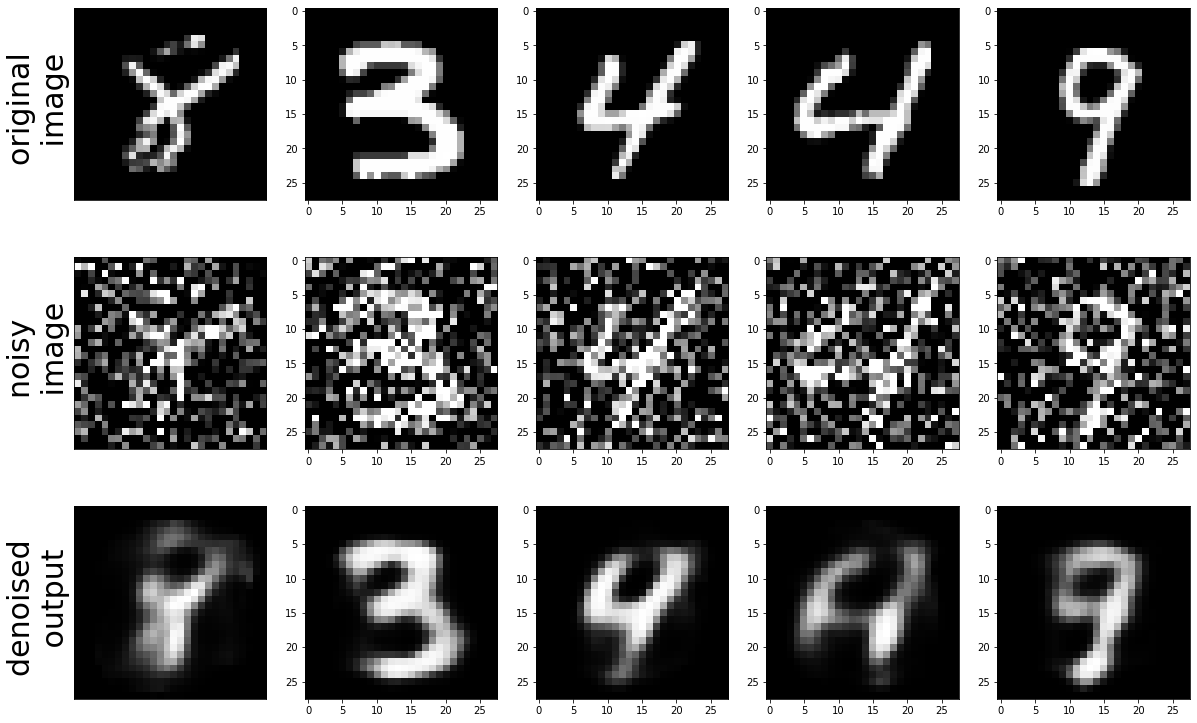

In [78]:
# plot the output and compare it with original image and the noisy image

fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5,figsize=(20,13))
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# 1st row for original images

for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i== 0:
        ax.set_ylabel("original \n image", size=30)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
# 2nd row for imput image with noise added

for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i== 0:
        ax.set_ylabel("noisy \n image", size=30)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
# 3rd with output image from our autoencoder
for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i== 0:
        ax.set_ylabel("denoised \n output", size=30)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

## Deep Convolutional Denoising Autoencoder

In [80]:
conv_autoencoder = Sequential()

# encoder

conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu', padding='same', input_shape =(28,28,1)))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu', padding='same'))

# decoder

conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu', padding='same'))

# output

conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3),activation='sigmoid', padding='same'))



In [81]:
conv_autoencoder.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [82]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy.reshape(60000,28,28,1),
                    X_train_reshaped.reshape(60000,28,28,1),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.1196
Epoch 2/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1019
Epoch 3/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1005
Epoch 4/10
1875/1875 [==============================] - 2176s 1s/step - loss: 0.0998
Epoch 5/10
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0993
Epoch 6/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0988
Epoch 7/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0984
Epoch 8/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0981
Epoch 9/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0979
Epoch 10/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0977


In [83]:
output = conv_autoencoder.predict(X_test_noisy.reshape(10000,28,28,1))

In [84]:
# compare the output with the original image and the noisy image

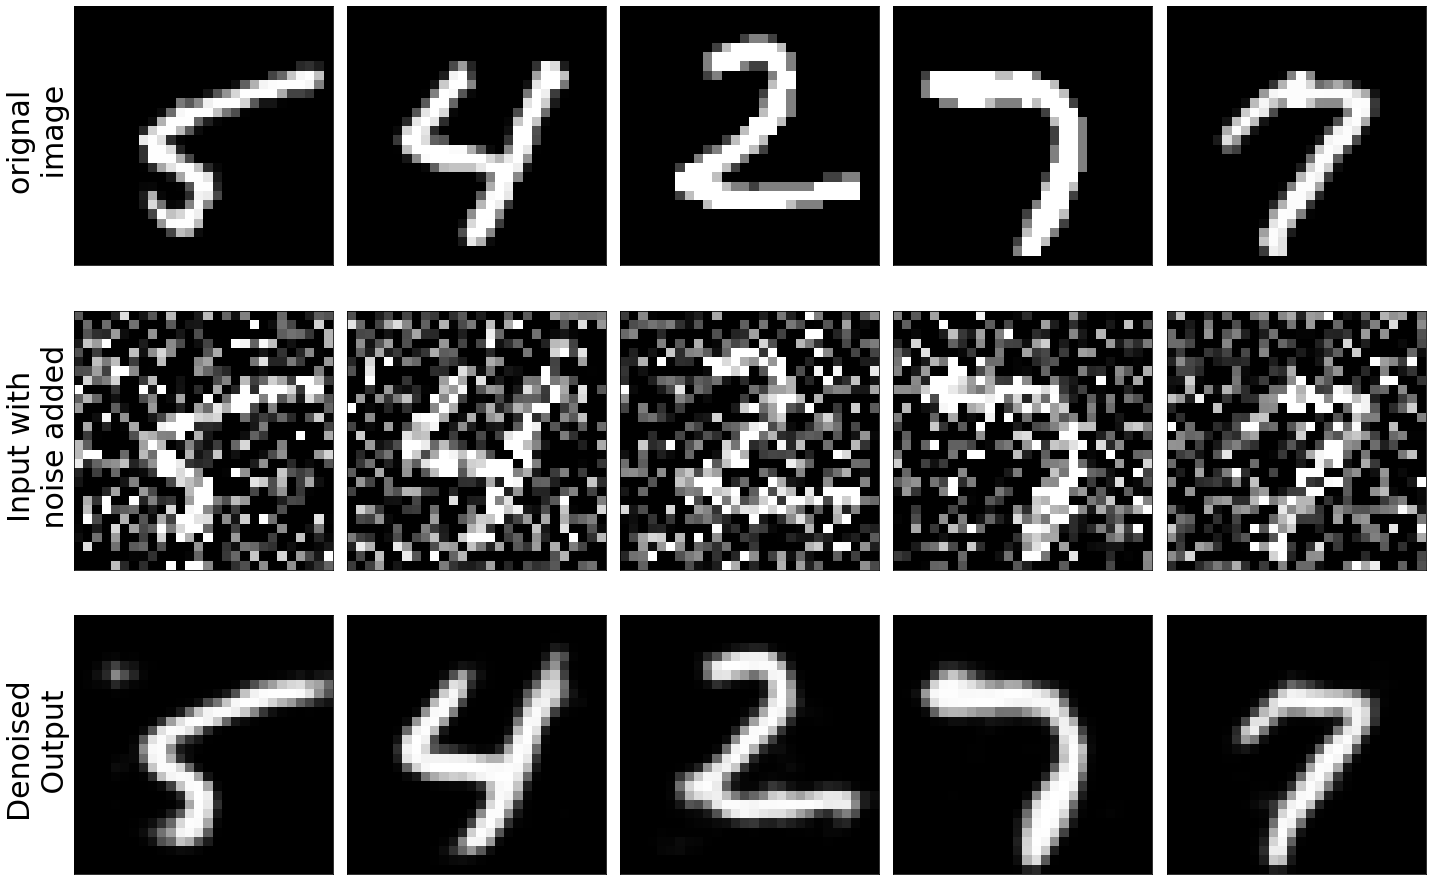

In [88]:
fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5,figsize=(20,13))

randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# 1st row for original image

for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("orignal \n image", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
# 2nd row for input with noise added

for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i==0:
        ax.set_ylabel("Input with \n noise added", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 3rd row for output image from our autoencoder

for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i ==0:
        ax.set_ylabel("Denoised \n Output", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])


plt.tight_layout()
plt.show()